<a href="https://colab.research.google.com/github/Igor-Belskiy/netology-case/blob/main/%D0%A7%D0%B5%D1%80%D0%BD%D0%BE%D0%B2%D0%B8%D0%BA_%D0%9D%D0%B5%D1%82%D0%BE%D0%BB%D0%BE%D0%B3%D0%B8%D1%8F_(%D0%BC%D0%BE%D1%91_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка библиотек и файлов данных

In [26]:
import numpy as np   # для работы с данными
import pandas as pd   # для работы с таблицами
import time    # Импортируем библиотеку time
from datetime import datetime    # Для обработки дат
import re

import matplotlib.pyplot as plt #Отрисовка графиков

from tensorflow.keras.preprocessing.text import Tokenizer   # Методы для работы с текстами и преоборазвания их в последовательности
from tensorflow.keras import utils  # для работы с категориальными данными
from tensorflow.keras.optimizers import Adam #Оптимизатор
from tensorflow.keras.models import Sequential, Model #Два варианты моделей
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM, GlobalMaxPooling1D, MaxPooling1D, RepeatVector #Стандартные слои
from tensorflow.keras.utils import plot_model     # Для отрисовки моделей

from sklearn.preprocessing import StandardScaler, MinMaxScaler #Нормировщики
from sklearn.model_selection import train_test_split  # Для раздения выборки на тестовую и обучающую
from sklearn.metrics import recall_score, precision_score   # Считать базовые метрики для задач классификации


In [2]:
!rm -R '/content/data' # Проверяем наличие папки data. Если есть, удаляем ее

rm: cannot remove '/content/data': No such file or directory


In [3]:
from google_drive_downloader import GoogleDriveDownloader as gdd   # для загрузки с гугл-драйва в колабораторию

# Копию бучающег и тестовог датасета предварительно загрузил к себе на гугл-диск
# и Колабораторию загружаю их напрямую уже со своего диска (досутуп отркыт для всех по ссылке)

gdd.download_file_from_google_drive(file_id='1WhW6MrKYgs_5K3gE-iPIRLJ3EZr09hnm', 
                                    dest_path='/content/data/test_dataset_test.csv', 
                                    showsize=True,
                                    overwrite=True) #Скачиваем тестовый датасет

gdd.download_file_from_google_drive(file_id='1XQ6wqeeOvi0xgAELvfhIN902kX16bsTa', 
                                    dest_path='/content/data/train_dataset_train.csv', 
                                    showsize=True,
                                    overwrite=True) #Скачиваем тренировочный датасет

13.3 MiB Done.
31.8 MiB Done.


In [4]:
gdd.download_file_from_google_drive(file_id='1aw5ykTUO15Z7FtXzGIxOtCOJghSP7uD6', 
                                    dest_path='/content/data/sample_solution.csv', 
                                    showsize=True,
                                    overwrite=True) #Скачиваем пример решения

704.0 KiB Done.


In [5]:
df_sample_solution = pd.read_csv('/content/data/sample_solution.csv', index_col= 0)

In [6]:
df_test = pd.read_csv('/content/data/test_dataset_test.csv', index_col= 0)

df_train = pd.read_csv('/content/data/train_dataset_train.csv', index_col= 0)

 # Осмотр данных

In [ ]:
df_sample_solution.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84997 entries, 77551 to 95178
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   target  84997 non-null  int64
dtypes: int64(1)
memory usage: 1.3 MB


In [ ]:
df_sample_solution.sample(5)

,target
id,
112112,0
46938,0
108355,0
230544,0
192790,0


In [ ]:
df_train['target'].value_counts()

0    174301
1     13512
5      3678
4      3659
3      3027
2      1823
Name: target, dtype: int64

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 15182 to 162913
Data columns (total 58 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   age_indicator              159123 non-null  float64
 1   month_id                   200000 non-null  object 
 2   student_id                 200000 non-null  int64  
 3   program_id                 200000 non-null  int64  
 4   carts_created_at           200000 non-null  object 
 5   spent_time_total           86309 non-null   float64
 6   spent_time_to_complete_hw  42467 non-null   float64
 7   completed_hw               97599 non-null   float64
 8   failed_hw                  97599 non-null   float64
 9   reworked_hw                97599 non-null   float64
 10  interacted_hw              97599 non-null   float64
 11  avg_hw_mark                44496 non-null   float64
 12  test_with_good_mark        97599 non-null   float64
 13  test_with_great_mark     

In [ ]:
for x in df_test.columns:

    print('\nСтолбец:', x) 
    print('Тип:', df_test[x].dtypes, '\n')
    print(df_test[x].value_counts())
    print('\nКоличество уникальных значений:', df_test[x].nunique())
    print('\nКоличество пропущенных значений (True - пропущенные, False - заполненные):\n',df_test[x].isna().value_counts())
    print('------------------------------------------------------------------------------------------------------------------------------------------------\n')


Столбец: age_indicator
Тип: float64 

19.0    1766
23.0    1751
3.0     1748
33.0    1744
34.0    1739
21.0    1739
37.0    1738
17.0    1731
7.0     1722
2.0     1717
28.0    1711
10.0    1711
11.0    1709
29.0    1708
31.0    1707
27.0    1705
13.0    1703
30.0    1703
35.0    1701
26.0    1701
4.0     1695
16.0    1695
14.0    1692
36.0    1692
9.0     1690
39.0    1689
1.0     1681
22.0    1679
15.0    1676
38.0    1675
20.0    1669
8.0     1666
24.0    1664
5.0     1661
6.0     1658
32.0    1646
12.0    1643
25.0    1640
18.0    1599
40.0    1384
Name: age_indicator, dtype: int64

Количество уникальных значений: 40

Количество пропущенных значений (True - пропущенные, False - заполненные):
 False    67548
True     17449
Name: age_indicator, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------


Столбец: month_id
Тип: object 

11/30/2021    10101
10/31/2021     9360
9/30/2021  

In [ ]:
for x in df_train.columns:

    print('\nСтолбец:', x) 
    print('Тип:', df_train[x].dtypes, '\n')
    print(df_train[x].value_counts())
    print('\nКоличество уникальных значений:', df_train[x].nunique())
    print('\nКоличество пропущенных значений (True - пропущенные, False - заполненные):\n',df_train[x].isna().value_counts())
    print('------------------------------------------------------------------------------------------------------------------------------------------------\n')


Столбец: age_indicator
Тип: float64 

25.0    4119
15.0    4066
8.0     4058
32.0    4057
12.0    4057
38.0    4047
39.0    4043
6.0     4043
35.0    4041
1.0     4040
30.0    4034
9.0     4034
22.0    4032
36.0    4031
4.0     4030
33.0    4023
13.0    4023
16.0    4020
10.0    4016
2.0     4013
28.0    4013
24.0    4012
31.0    4004
11.0    4002
29.0    4001
21.0    4000
27.0    3996
20.0    3983
7.0     3977
14.0    3972
26.0    3968
5.0     3959
17.0    3955
37.0    3951
23.0    3948
3.0     3940
19.0    3932
34.0    3887
18.0    3633
40.0    3163
Name: age_indicator, dtype: int64

Количество уникальных значений: 40

Количество пропущенных значений (True - пропущенные, False - заполненные):
 False    159123
True      40877
Name: age_indicator, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------


Столбец: month_id
Тип: object 

11/30/2021    23987
10/31/2021    21659
9/30/2021

In [ ]:
df_train.sample(5).transpose()

id,17838,149902,115559,25580,199451
age_indicator,15.0,9.0,26.0,8.0,NaN
month_id,10/31/2020,9/30/2021,7/31/2021,1/31/2021,11/30/2021
student_id,6563120,6744206,5992898,6673303,5936412
program_id,1543,1209,242,887,1287
carts_created_at,9/14/2020,8/23/2020,9/1/2020,7/3/2020,4/15/2021
spent_time_total,NaN,NaN,NaN,NaN,NaN
spent_time_to_complete_hw,NaN,NaN,NaN,NaN,NaN
completed_hw,NaN,NaN,NaN,NaN,NaN
failed_hw,NaN,NaN,NaN,NaN,NaN
reworked_hw,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 15182 to 162913
Data columns (total 58 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   age_indicator              159123 non-null  float64
 1   month_id                   200000 non-null  object 
 2   student_id                 200000 non-null  int64  
 3   program_id                 200000 non-null  int64  
 4   carts_created_at           200000 non-null  object 
 5   spent_time_total           86309 non-null   float64
 6   spent_time_to_complete_hw  42467 non-null   float64
 7   completed_hw               97599 non-null   float64
 8   failed_hw                  97599 non-null   float64
 9   reworked_hw                97599 non-null   float64
 10  interacted_hw              97599 non-null   float64
 11  avg_hw_mark                44496 non-null   float64
 12  test_with_good_mark        97599 non-null   float64
 13  test_with_great_mark     

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84997 entries, 77551 to 95178
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age_indicator              67548 non-null  float64
 1   month_id                   84997 non-null  object 
 2   student_id                 84997 non-null  int64  
 3   program_id                 84997 non-null  int64  
 4   carts_created_at           84997 non-null  object 
 5   spent_time_total           36687 non-null  float64
 6   spent_time_to_complete_hw  18046 non-null  float64
 7   completed_hw               41481 non-null  float64
 8   failed_hw                  41481 non-null  float64
 9   reworked_hw                41481 non-null  float64
 10  interacted_hw              41481 non-null  float64
 11  avg_hw_mark                18909 non-null  float64
 12  test_with_good_mark        41481 non-null  float64
 13  test_with_great_mark       41481 non-null 

# Кодируем выход методом One Hot Encoding

In [7]:
df_train['target'].value_counts()

0    174301
1     13512
5      3678
4      3659
3      3027
2      1823
Name: target, dtype: int64

In [8]:
y_Train = utils.to_categorical(df_train['target'], 6)

In [ ]:
y_Train[10050]

array([0., 0., 0., 0., 1., 0.], dtype=float32)

In [ ]:
df_train['target'].iloc[10050]

4

In [ ]:
y_Train.shape

(200000, 6)

# Удаляем столбцы, которые не будем обрабатывать

In [9]:
df_train = df_train.drop(labels=['student_id', 'spent_time_to_complete_hw'], axis = 1 )

#Обрабатываем числовые столбцы float64

## Заполняем средними значениями

In [10]:
# Меняем тип данных в столбцах 'gender' и 'age_indicator' с float64 на int64
# Так как будем их обрабатывать в дугой группе данных

print('До:',df_train['gender'].dtype, df_train['age_indicator'].dtype)

df_train['gender'] = df_train['gender'].convert_dtypes()
df_train['age_indicator'] = df_train['age_indicator'].convert_dtypes()

print('После:',df_train['gender'].dtype, df_train['age_indicator'].dtype)

До: float64 float64
После: Int64 Int64


In [11]:
# Пять столбцов  'bought_d..' переводим в формат float64 для дальнейшей обработки и нормирования

list_to_float64 =['bought_d1', 'bought_d2', 'bought_d3', 'bought_d4', 'bought_d5']

df_train[list_to_float64] = df_train[list_to_float64].astype('float64')

In [ ]:
df_train[list_to_float64].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 15182 to 162913
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   bought_d1  200000 non-null  float64
 1   bought_d2  200000 non-null  float64
 2   bought_d3  200000 non-null  float64
 3   bought_d4  200000 non-null  float64
 4   bought_d5  200000 non-null  float64
dtypes: float64(5)
memory usage: 9.2 MB


In [12]:
# Для дальнейшего заполнения пропусков средними значениями и нормирования
# Отбираем столбцы типа 'float64', 

num_columns = df_train.columns[df_train.dtypes == 'float64']

num_columns      # Список столбцов, которые будут нормализовываться

Index(['spent_time_total', 'completed_hw', 'failed_hw', 'reworked_hw',
       'interacted_hw', 'avg_hw_mark', 'test_with_good_mark',
       'test_with_great_mark', 'webinars', 'avg_quiz_result', 'notes',
       'hw_leader', 'lessons', 'activity', 'bought_d1', 'bought_d2',
       'bought_d3', 'bought_d4', 'bought_d5', 'bought_avg_duration', 'price',
       'speed_recall', 'm_avg_talk_duration', 'm_avg_duration',
       'm_missed_calls', 'm_total_calls', 'm_was_conversations',
       'm_total_duration', 'p_avg_talk_duration', 'p_avg_duration',
       'p_missed_calls', 'p_total_calls', 'p_was_conversations',
       'p_total_duration', 'support_feedback_avg', 'feedback_avg_d1',
       'feedback_avg_d2', 'feedback_avg_d3', 'feedback_avg_d4',
       'feedback_avg_d5'],
      dtype='object')

In [13]:
# Рассчитываем средние значения в столбцах для заполнения отсутствующих значений

mean_value_to_fill_num_columns = df_train[num_columns].mean()

mean_value_to_fill_num_columns    # Средние значения, которыми заполнялись столбцы.

spent_time_total           77.865344
completed_hw                1.335106
failed_hw                   0.023330
reworked_hw                 5.859230
interacted_hw               3.439267
avg_hw_mark                99.194723
test_with_good_mark         3.505405
test_with_great_mark        2.447873
webinars                    2.411992
avg_quiz_result            85.508932
notes                      49.108874
hw_leader                   0.084540
lessons                     8.877458
activity                   13.804732
bought_d1                   0.036865
bought_d2                   0.007795
bought_d3                   0.005805
bought_d4                   0.006990
bought_d5                   0.013715
bought_avg_duration        44.344145
price                   26743.294469
speed_recall                1.281170
m_avg_talk_duration       171.674749
m_avg_duration            225.517752
m_missed_calls              0.984904
m_total_calls               3.019229
m_was_conversations         2.034325
m

In [14]:
# Заполняем средними значениями отсутствующие значения в указанных столбцах
# df_train = df_train.fillna(0)    # На случай, если хочу заполнить пропущенные не средними значениями, а нулями

df_train = df_train.fillna(value=mean_value_to_fill_num_columns)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 15182 to 162913
Data columns (total 56 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   age_indicator         159123 non-null  Int64  
 1   month_id              200000 non-null  object 
 2   program_id            200000 non-null  int64  
 3   carts_created_at      200000 non-null  object 
 4   spent_time_total      200000 non-null  float64
 5   completed_hw          200000 non-null  float64
 6   failed_hw             200000 non-null  float64
 7   reworked_hw           200000 non-null  float64
 8   interacted_hw         200000 non-null  float64
 9   avg_hw_mark           200000 non-null  float64
 10  test_with_good_mark   200000 non-null  float64
 11  test_with_great_mark  200000 non-null  float64
 12  webinars              200000 non-null  float64
 13  avg_quiz_result       200000 non-null  float64
 14  notes                 200000 non-null  float64
 

## Нормируем отобранные столбцы float64

In [15]:
x_Train_num = []       # Cюда будем складывать данные после нормирования

ScalerList = []    # Список для хранения нормировщиков

for x in num_columns:
    
    CurScaler = MinMaxScaler()                  # Создаём нормировщик
    y = np.array(df_train[x]).reshape(-1, 1)    # Меняем форму столбца, перед подачей в нормировщик
    CurScaler.fit(y)                            # Тренируем нормировщик   
    ScalerList.append([x,CurScaler])            # Сохраняем обученный нормировщик в список (для контроля еще сохраняем название столбца)
    y_scaled = CurScaler.transform(y)           # Нормируем полученные данные
    x_Train_num.append(y_scaled.reshape(df_train.shape[0]))

x_Train_num = np.array(x_Train_num).transpose()         # Переводим в формат numpy. 
                                                        # Форма x_Train_num на выходе (200000, 40)


# Готовим первую сеть на входе только с цифровыми нормированными данными (1)

In [16]:
# test_size=0.2 - будет выделено 20% от тренировочных данных 
# shuffle=True - перемешать данные
# x_train - данные для обучения
# x_test - данные для проверки
# y_train - правильные ответы для обучения
# y_test - правильные ответы для проверки
x_train, x_test, y_train, y_test = train_test_split(x_Train_num, y_Train, test_size=0.2, shuffle=True)

In [17]:
#Создаём нейронку
model_1 = Sequential()
model_1.add(Dense(150, activation='relu'))
model_1.add(Dense(100, activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Dense(6, activation='sigmoid'))

In [22]:
model_1.compile(optimizer=Adam(learning_rate=1e-4), 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])  

In [35]:
history = model_1.fit(x_train, 
                      y_train, 
                      epochs=20,
                      batch_size=50,
                      validation_data=(x_test, y_test))

Epoch 1/20
3200/3200 [==============================] - 10s 3ms/step - loss: 0.5300 - accuracy: 0.8713 - val_loss: 0.5201 - val_accuracy: 0.8745
Epoch 2/20
3200/3200 [==============================] - 9s 3ms/step - loss: 0.5298 - accuracy: 0.8713 - val_loss: 0.5195 - val_accuracy: 0.8745
Epoch 3/20
3200/3200 [==============================] - 11s 3ms/step - loss: 0.5295 - accuracy: 0.8713 - val_loss: 0.5198 - val_accuracy: 0.8745
Epoch 4/20
3200/3200 [==============================] - 10s 3ms/step - loss: 0.5296 - accuracy: 0.8713 - val_loss: 0.5193 - val_accuracy: 0.8744
Epoch 5/20
3200/3200 [==============================] - 10s 3ms/step - loss: 0.5295 - accuracy: 0.8713 - val_loss: 0.5202 - val_accuracy: 0.8745
Epoch 6/20
3200/3200 [==============================] - 11s 4ms/step - loss: 0.5295 - accuracy: 0.8713 - val_loss: 0.5197 - val_accuracy: 0.8745
Epoch 7/20
3200/3200 [==============================] - 9s 3ms/step - loss: 0.5292 - accuracy: 0.8713 - val_loss: 0.5199 - val_accu

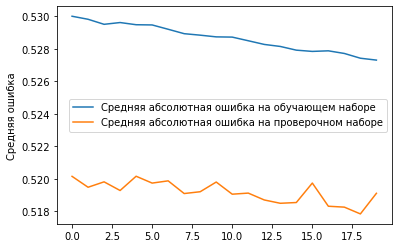

In [36]:
#Выводим графики

plt.plot(history.history['loss'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (50, 150)                 6150      
                                                                 
 dense_1 (Dense)             (50, 100)                 15100     
                                                                 
 batch_normalization (BatchN  (50, 100)                400       
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (50, 6)                   606       
                                                                 
Total params: 22,256
Trainable params: 22,056
Non-trainable params: 200
_________________________________________________________________


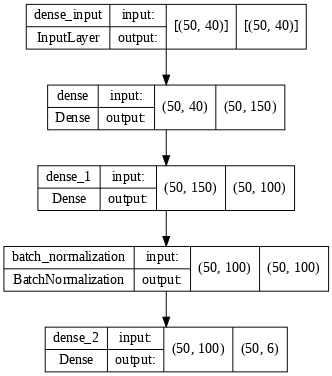

In [21]:
model_1.summary()
plot_model(model_1, dpi=70, show_shapes=True)

## Делаем предикт по сети 1 и готовим выходной файл для загрузки на платформу

In [48]:
# Аалогично обрабатываем тестовые данные

df_test = df_test.drop(labels=['student_id', 'spent_time_to_complete_hw'], axis = 1 )
df_test['gender'] = df_test['gender'].convert_dtypes()
df_test['age_indicator'] = df_test['age_indicator'].convert_dtypes()
df_test[list_to_float64] = df_test[list_to_float64].astype('float64')


In [49]:
# df_test = df_test.fillna(0)             # Выбираем эту строку, если хотим заполнить отсутствующие значения не средними числами, а нулями

df_test = df_test.fillna(value=mean_value_to_fill_num_columns)     # Средние значения берём после обработки обучающего набора

In [50]:
ScalerDict = dict(ScalerList)       # Для удобства превращаем список нормировщиков в словарь

x_Test_num = []                     # Складываем сюда нормированные данные тестового набора

for x in num_columns:

    CurScaler = ScalerDict[x]                  
    y = np.array(df_test[x]).reshape(-1, 1)    # Меняем форму столбца, перед подачей в нормировщик
    y_scaled = CurScaler.transform(y)           # Нормируем полученные данные
    x_Test_num.append(y_scaled.reshape(df_test.shape[0]))

x_Test_num = np.array(x_Test_num).transpose()           # Переводим в формат numpy. 
                                                        # Форма x_Test_num на выходе (84997, 40)
   

In [51]:
result_1 = model_1.predict(x_Test_num)

In [52]:
df_result = df_test.copy(deep=True)    # Делаем копиюю тестового дата-сета, чтобы сохранить индексы строк при выгрузке

In [53]:
rints = np.argmax(result_1, axis=1)    # Преобразуем выход сети из 6 чисел float64 с вероятностями в массив индексов позиции с максимальной вероятностью

df_result.insert(0, 'target', rints)

df_result = df_result.drop(df_test.columns, axis = 1)

df_result.to_csv('result_2.csv')

# Готовим категориальные данные (ЗДЕСЬ РАБОТАЕМ)

In [ ]:
df_train.columns[df_train.dtypes != 'float64']

Index(['age_indicator', 'month_id', 'program_id', 'carts_created_at',
       'payment_type', 'promo', 'communication_type', 'auto_payment', 'ABC',
       'city', 'country', 'gender', 'os', 'browser', 'platform', 'target'],
      dtype='object')

In [ ]:
category_columns = [x for x in df_train.columns if (x not in num_columns) and (x != 'target') ]

category_columns

['age_indicator',
 'month_id',
 'program_id',
 'carts_created_at',
 'payment_type',
 'promo',
 'communication_type',
 'auto_payment',
 'ABC',
 'city',
 'country',
 'gender',
 'os',
 'browser',
 'platform']

# Делаем предикт на обучающих данных и оцениваем результат по метрике чемпионата

In [43]:
result_train_data = model_1.predict(x_Train_num)     # Делаем предикт по цифровым тренировочным данным.

In [44]:
result_train_data_int = np.argmax(result_train_data, axis=1)    #  Приводим вероятности на выходе OHE к номеру победившего варианта


In [45]:
# Подсчитываем базовые метрики   

recall = recall_score(df_train['target'] , result_train_data_int, average='macro')

recall

0.1743459165882596

In [46]:
precision = precision_score(df_train['target'] , result_train_data_int, average='macro')

precision

0.43407105955206826

In [47]:
0.2 * recall + 0.8 * precision

0.3821260309593066

# Готовим данные в таблицу для анализа  (технический раздел)

In [ ]:
s = df_train.sample(3).transpose()

s.insert(0,'type', df_train.dtypes)  

s.insert(1, 'notnull', df_train.notnull().sum())

s.insert(2, 'nunique', df_train.nunique())

s.to_excel('types.xls')

s

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  if __name__ == '__main__':


id,type,notnull,nunique,88554,20242,275601
age_indicator,float64,159123,40,38.0,NaN,37.0
month_id,object,200000,18,11/30/2020,9/30/2020,11/30/2021
student_id,int64,200000,31153,6751980,6812347,169651
program_id,int64,200000,267,446,581,1157
carts_created_at,object,200000,447,8/28/2020,9/18/2020,10/6/2020
spent_time_total,float64,86309,945,6.0,1.0,NaN
spent_time_to_complete_hw,float64,42467,2,NaN,NaN,NaN
completed_hw,float64,97599,20,0.0,0.0,NaN
failed_hw,float64,97599,36,0.0,0.0,NaN
reworked_hw,float64,97599,216,0.0,0.0,NaN


# Готовим файл случайный результат для проверки выгрузки на платформу

In [ ]:
# Готовим случайный вектор для тестиования выхода сети
rng = np.random.default_rng()
rints = rng.integers(low=0, high=6, size=df_test.shape[0])

rints

array([1, 4, 5, ..., 2, 4, 1])

In [ ]:
df_result = df_test.copy(deep=True)

In [ ]:
# Пробуем заполнять файл результата случайными данными.

df_result.insert(0, 'target', rints)

df_result = df_result.drop(df_test.columns, axis = 1)

df_result.to_csv('result_1.csv')